# Preprocessing data

Tahap pertama penyetinggan API, Libraries, Dataset

In [67]:
# Block 1: Install Kaggle API dan Download Dataset

# Install Kaggle API
!pip install -q kaggle

# Import library yang diperlukan
from sklearn.model_selection import train_test_split
from google.colab import files

# Unggah file kaggle.json dari komputer Anda
files.upload()

# Pindahkan file kaggle.json ke direktori yang benar
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Verifikasi Kaggle API
!kaggle datasets list

# Download dataset dengan nama yang benar
!kaggle datasets download -d allandclive/chicken-disease-1 --force

# Unzip dataset ke dalam folder /content/dataset
!unzip -o chicken-disease-1.zip -d /content/dataset

# List file di dalam folder /content/dataset
!ls /content/dataset

# Opsional: Simpan dataset ke Google Drive untuk penggunaan di sesi berikutnya
from google.colab import drive
drive.mount('/content/drive')  # Mount Google Drive

# Salin dataset ke Google Drive untuk backup
!cp -r /content/dataset /content/drive/MyDrive/dataset/


Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/Train/healthy.1869.jpg  
  inflating: /content/dataset/Train/healthy.187.jpg  
  inflating: /content/dataset/Train/healthy.1870.jpg  
  inflating: /content/dataset/Train/healthy.1871.jpg  
  inflating: /content/dataset/Train/healthy.1872.jpg  
  inflating: /content/dataset/Train/healthy.1873.jpg  
  inflating: /content/dataset/Train/healthy.1874.jpg  
  inflating: /content/dataset/Train/healthy.1875.jpg  
  inflating: /content/dataset/Train/healthy.1876.jpg  
  inflating: /content/dataset/Train/healthy.1877.jpg  
  inflating: /content/dataset/Train/healthy.1878.jpg  
  inflating: /content/dataset/Train/healthy.1879.jpg  
  inflating: /content/dataset/Train/healthy.188.jpg  
  inflating: /content/dataset/Train/healthy.1880.jpg  
  inflating: /content/dataset/Train/healthy.1881.jpg  
  inflating: /content/dataset/Train/healthy.1882.jpg  
  inflating: /content/dataset/Train/healthy.1883.jpg  
  inflating: /co

melihat isi folder

In [68]:
# Block 2: List file dari folder Train
!ls /content/dataset/Train/


 cocci.0.jpg	  cocci.561.jpg      healthy.2012.jpg	   pcrcocci.3.jpg       salmo.15.jpg
 cocci.1000.jpg   cocci.562.jpg      healthy.2013.jpg	   pcrcocci.40.jpg      salmo.1600.jpg
 cocci.1001.jpg   cocci.563.jpg      healthy.2014.jpg	   pcrcocci.41.jpg      salmo.1601.jpg
 cocci.1002.jpg   cocci.564.jpg      healthy.2015.jpg	   pcrcocci.42.jpg      salmo.1602.jpg
 cocci.1003.jpg   cocci.565.jpg      healthy.2016.jpg	   pcrcocci.43.jpg      salmo.1603.jpg
 cocci.1004.jpg   cocci.566.jpg      healthy.2017.jpg	   pcrcocci.44.jpg      salmo.1604.jpg
 cocci.1005.jpg   cocci.567.jpg      healthy.2018.jpg	   pcrcocci.45.jpg      salmo.1605.jpg
 cocci.1006.jpg   cocci.568.jpg      healthy.2019.jpg	   pcrcocci.46.jpg      salmo.1606.jpg
 cocci.1007.jpg   cocci.569.jpg      healthy.201.jpg	   pcrcocci.47.jpg      salmo.1607.jpg
 cocci.1008.jpg   cocci.56.jpg	     healthy.2020.jpg	   pcrcocci.48.jpg      salmo.1608.jpg
 cocci.1009.jpg   cocci.570.jpg      healthy.2021.jpg	   pcrcocci.49.jpg     

install TensorFlow

In [69]:
# Block 4: Install TensorFlow versi stabil
!pip install tensorflow==2.11.0 protobuf


In [70]:
import tensorflow as tf
print(tf.__version__)  # Memeriksa versi TensorFlow yang diinstal


2.11.0


pengecekan folder label kelas

In [71]:
# Cek apakah folder Train ada
if os.path.exists(train_dir):
    print(f"Folder {train_dir} ditemukan")
    print("Berikut adalah isi folder Train:")
    print(os.listdir(train_dir))  # List isi folder Train
else:
    print(f"Folder {train_dir} tidak ditemukan")


Folder /content/dataset/Train ditemukan
Berikut adalah isi folder Train:
['cocci.1955.jpg', 'cocci.41.jpg', 'healthy.1524.jpg', 'salmo.1237.jpg', 'healthy.1563.jpg', 'cocci.1792.jpg', 'salmo.1208.jpg', 'cocci.1266.jpg', 'cocci.1433.jpg', 'cocci.193.jpg', 'cocci.941.jpg', 'healthy.1445.jpg', 'pcrcocci.187.jpg', 'pcrhealthy.243.jpg', 'cocci.931.jpg', 'cocci.1859.jpg', 'healthy.1090.jpg', 'healthy.685.jpg', 'cocci.667.jpg', 'healthy.1606.jpg', 'pcrsalmo.296.jpg', 'healthy.1485.jpg', 'healthy.2054.jpg', 'salmo.144.jpg', 'healthy.215.jpg', 'salmo.1482.jpg', 'salmo.670.jpg', 'salmo.1692.jpg', 'pcrcocci.218.jpg', 'salmo.1552.jpg', 'cocci.1906.jpg', 'healthy.999.jpg', 'pcrsalmo.34.jpg', 'salmo.1173.jpg', 'healthy.617.jpg', 'cocci.1549.jpg', 'healthy.603.jpg', 'healthy.1921.jpg', 'salmo.627.jpg', 'pcrcocci.111.jpg', 'healthy.1000.jpg', 'cocci.761.jpg', 'pcrhealthy.235.jpg', 'salmo.975.jpg', 'ncd.67.jpg', 'pcrhealthy.211.jpg', 'salmo.1895.jpg', 'pcrcocci.171.jpg', 'salmo.1631.jpg', 'cocci.873.jp

karena tidak ada folder label kelas jadi kita buat baru

In [74]:
import os

# Direktori dataset
train_dir = '/content/dataset/Train'

# Nama kelas berdasarkan pola nama file
class_names = {
    'cocci': 'Coccidiosis',
    'pcrcocci': 'Coccidiosis',
    'healthy': 'Healthy',
    'pcrhealthy': 'Healthy',
    'ncd': 'New Castle Disease',
    'pcrncd': 'New Castle Disease',
    'salmo': 'Salmonella',
    'pcrsalmo': 'Salmonella'
}

# Buat folder untuk setiap kelas
for class_name in set(class_names.values()):  # Menggunakan set untuk menghindari duplikat
    class_folder = os.path.join(train_dir, class_name)
    os.makedirs(class_folder, exist_ok=True)  # Membuat folder jika belum ada
    print(f"Folder {class_name} dibuat")


Folder Salmonella dibuat
Folder Coccidiosis dibuat
Folder New Castle Disease dibuat
Folder Healthy dibuat


pindahkan file data sesuai label kelas

In [76]:
import os
import shutil

# Direktori dataset
train_dir = '/content/dataset/Train'

# Nama kelas berdasarkan pola nama file
class_names = {
    'cocci': 'Coccidiosis',
    'pcrcocci': 'Coccidiosis',
    'healthy': 'Healthy',
    'pcrhealthy': 'Healthy',
    'ncd': 'New Castle Disease',
    'pcrncd': 'New Castle Disease',
    'salmo': 'Salmonella',
    'pcrsalmo': 'Salmonella'
}

# Pindahkan gambar ke folder yang sesuai
for img_file in os.listdir(train_dir):
    img_path = os.path.join(train_dir, img_file)
    if os.path.isfile(img_path):  # Cek apakah itu file
        for prefix, class_name in class_names.items():
            if img_file.startswith(prefix):  # Cek apakah nama file cocok dengan kelas
                class_folder = os.path.join(train_dir, class_name)

                # Siapkan jalur file tujuan
                dest_path = os.path.join(class_folder, img_file)

                # Cek apakah file sudah ada di folder tujuan
                if os.path.exists(dest_path):
                    # Ambil nama file tanpa ekstensi dan ekstensi
                    base_name, ext = os.path.splitext(img_file)
                    counter = 1
                    # Buat nama file baru jika sudah ada
                    while os.path.exists(dest_path):
                        dest_path = os.path.join(class_folder, f"{base_name}_{counter}{ext}")
                        counter += 1

                shutil.move(img_path, dest_path)  # Memindahkan file
                print(f"{img_file} dipindahkan ke folder {class_name}")
                break


Streaming output truncated to the last 5000 lines.
salmo.1542.jpg dipindahkan ke folder Salmonella
salmo.1164.jpg dipindahkan ke folder Salmonella
pcrncd.40.jpg dipindahkan ke folder New Castle Disease
healthy.713.jpg dipindahkan ke folder Healthy
salmo.619.jpg dipindahkan ke folder Salmonella
cocci.419.jpg dipindahkan ke folder Coccidiosis
cocci.81.jpg dipindahkan ke folder Coccidiosis
healthy.1478.jpg dipindahkan ke folder Healthy
cocci.1206.jpg dipindahkan ke folder Coccidiosis
pcrhealthy.271.jpg dipindahkan ke folder Healthy
healthy.1499.jpg dipindahkan ke folder Healthy
healthy.180.jpg dipindahkan ke folder Healthy
salmo.1452.jpg dipindahkan ke folder Salmonella
cocci.1924.jpg dipindahkan ke folder Coccidiosis
salmo.749.jpg dipindahkan ke folder Salmonella
salmo.42.jpg dipindahkan ke folder Salmonella
cocci.186.jpg dipindahkan ke folder Coccidiosis
salmo.1687.jpg dipindahkan ke folder Salmonella
healthy.1177.jpg dipindahkan ke folder Healthy
salmo.1322.jpg dipindahkan ke folder Sa

cek hasil struktur folder kelas beserta jumlah gambarnya

In [77]:
import os

# Direktori dataset
train_dir = '/content/dataset/Train'

# Cek kelas di dalam folder Train
classes = os.listdir(train_dir)

# Menampilkan jumlah gambar di setiap kelas
for class_name in classes:
    class_path = os.path.join(train_dir, class_name)
    if os.path.isdir(class_path):
        images = os.listdir(class_path)
        print(f"Kelas {class_name}: {len(images)} gambar")


Kelas Coccidiosis: 2849 gambar
Kelas Healthy: 2751 gambar
Kelas New Castle Disease: 748 gambar
Kelas Salmonella: 2974 gambar


Pembagian data untuk train dan validation

In [78]:
# Block 3: Split Dataset ke Train dan Validation
import os
import shutil
from sklearn.model_selection import train_test_split

# Define the main dataset directory
dataset_dir = '/content/dataset/Train'  # Sesuaikan dengan folder dataset yang diunzip

# Define directories for training and validation sets
train_dir = '/content/dataset_split/train'
val_dir = '/content/dataset_split/val'

# Buat folder train dan val jika belum ada
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# Loop untuk setiap kelas di dalam dataset (misal 'normal', 'disease')
for class_name in os.listdir(dataset_dir):
    class_path = os.path.join(dataset_dir, class_name)

    if os.path.isdir(class_path):  # Pastikan ini adalah folder kelas
        images = os.listdir(class_path)  # List semua gambar di folder kelas
        images = [f for f in images if os.path.isfile(os.path.join(class_path, f))]  # Hanya file

        # Bagi data menjadi train dan validation (80:20 split)
        train_images, val_images = train_test_split(images, test_size=0.2, random_state=42)

        # Buat folder kelas di dalam train dan val
        os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
        os.makedirs(os.path.join(val_dir, class_name), exist_ok=True)

        # Pindahkan gambar untuk training
        for img in train_images:
            shutil.move(os.path.join(class_path, img), os.path.join(train_dir, class_name, img))

        # Pindahkan gambar untuk validation
        for img in val_images:
            shutil.move(os.path.join(class_path, img), os.path.join(val_dir, class_name, img))


cek hasilnya

In [79]:
# Cek jumlah gambar di setiap folder train dan val setelah dipindahkan
for class_name in os.listdir(train_dir):
    train_class_path = os.path.join(train_dir, class_name)
    val_class_path = os.path.join(val_dir, class_name)

    train_images = os.listdir(train_class_path)
    val_images = os.listdir(val_class_path)

    print(f"Kelas {class_name}:")
    print(f"  - {len(train_images)} gambar di folder train")
    print(f"  - {len(val_images)} gambar di folder val")


Kelas Coccidiosis:
  - 2611 gambar di folder train
  - 899 gambar di folder val
Kelas Healthy:
  - 2537 gambar di folder train
  - 887 gambar di folder val
Kelas New Castle Disease:
  - 651 gambar di folder train
  - 213 gambar di folder val
Kelas Salmonella:
  - 2745 gambar di folder train
  - 950 gambar di folder val


In [80]:
# Install pandas if not already installed
!pip install pandas

# Import pandas library
import pandas as pd

# Membaca file CSV
csv_path = '/content/dataset/train_data.csv'
df = pd.read_csv(csv_path)

# Menampilkan beberapa baris pertama
print(df.head())


           images               label
0  salmo.1558.jpg          Salmonella
1  cocci.1866.jpg         Coccidiosis
2   cocci.171.jpg         Coccidiosis
3  salmo.1484.jpg          Salmonella
4     ncd.100.jpg  New Castle Disease


cek dan data cleaning

In [84]:
# Memeriksa data missing
print("Data Missing:")
print(df.isnull().sum())  # Menampilkan jumlah nilai yang hilang per kolom

# Memeriksa apakah ada duplikat
duplicates = df.duplicated().sum()
print(f"\nJumlah duplikat: {duplicates}")

# Menghapus duplikat jika ada
if duplicates > 0:
    df = df.drop_duplicates()
    print("Duplikat telah dihapus.")

# Menghapus baris dengan nilai yang hilang (jika ada)
df = df.dropna()  # Hapus baris dengan nilai yang hilang

# Menampilkan informasi DataFrame setelah cleaning
print("\nInformasi DataFrame setelah cleaning:")
print(df.info())


Data Missing:
images    0
label     0
dtype: int64

Jumlah duplikat: 0

Informasi DataFrame setelah cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8067 entries, 0 to 8066
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   images  8067 non-null   object
 1   label   8067 non-null   object
dtypes: object(2)
memory usage: 126.2+ KB
None


Tahap augmentasi data

In [85]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image data generator untuk augmentasi pada training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Hanya rescaling untuk validation (tidak ada augmentasi)
val_datagen = ImageDataGenerator(rescale=1./255)

# Path ke direktori train dan validation
train_dir = '/content/dataset_split/train'
val_dir = '/content/dataset_split/val'

# Load dan augment data pelatihan
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Ukuran gambar sesuai yang diharapkan model CNN
    batch_size=32,
    class_mode='categorical'  # Multi-class classification
)

# Load data validasi (tanpa augmentasi)
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 8544 images belonging to 4 classes.
Found 2949 images belonging to 4 classes.


cek hasil augmentasi

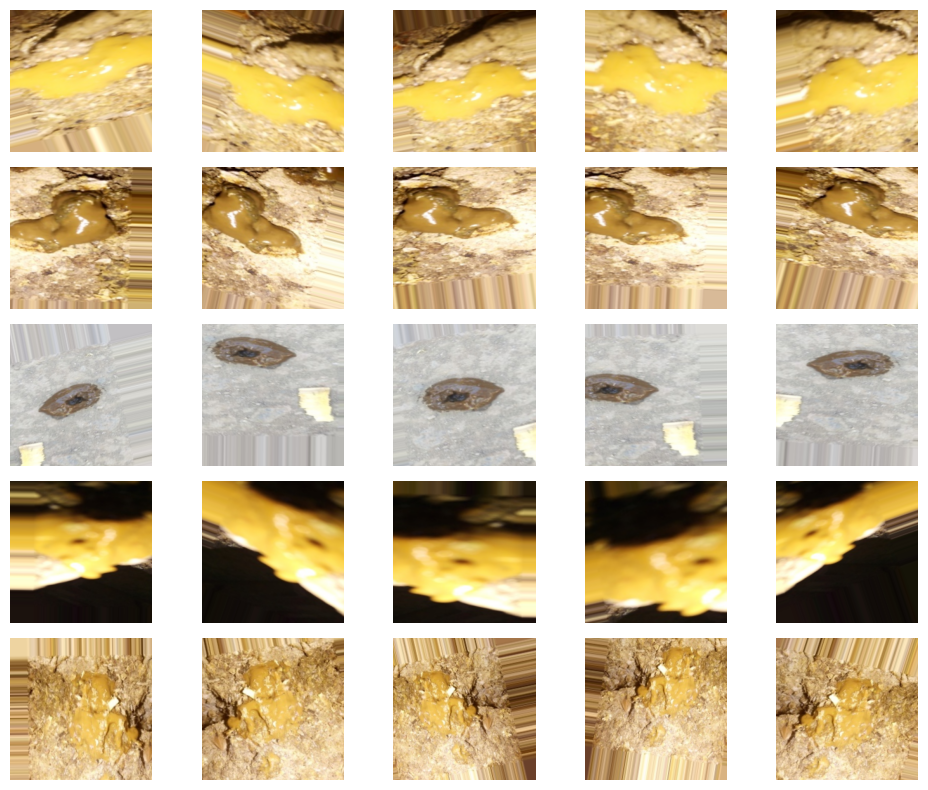

In [87]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path ke direktori train
train_dir = '/content/dataset_split/train'
class_names = ['Coccidiosis', 'Healthy', 'New Castle Disease', 'Salmonella']

# Buat instance ImageDataGenerator untuk augmentasi
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Ambil beberapa gambar dari kelas pertama untuk contoh
class_path = os.path.join(train_dir, class_names[0])
images = os.listdir(class_path)[:5]  # Ambil 5 gambar pertama

plt.figure(figsize=(10, 8))

for i, img_name in enumerate(images):
    img_path = os.path.join(class_path, img_name)
    img = mpimg.imread(img_path)
    img = img.reshape((1,) + img.shape)  # Ubah bentuk untuk augmentasi

    # Augmentasi dan tampilkan hasilnya
    for j in range(5):  # Ambil 5 contoh augmentasi
        augmented_images = datagen.flow(img)  # Augmentasi
        aug_img = next(augmented_images)[0]  # Ambil gambar yang diaugmentasi
        plt.subplot(5, 5, i * 5 + j + 1)
        plt.imshow(aug_img)
        plt.axis('off')

plt.tight_layout()
plt.show()


Setelah tahap ini, langkah selanjutnya adalah membangun dan melatih model

##Tahap Visualisasi data

Visualisasi Distribusi Data

<ipython-input-88-64d674a0ffcc>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


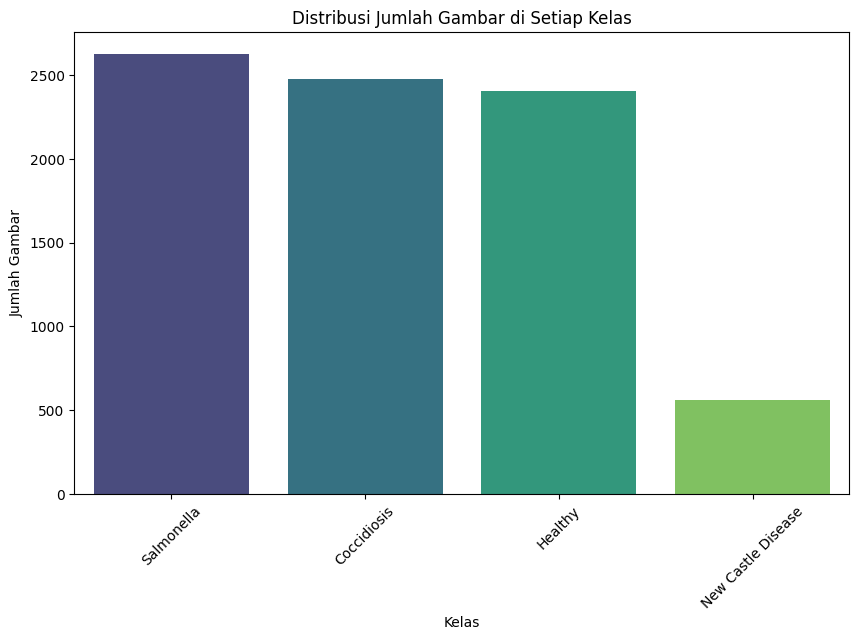

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca file CSV
csv_path = '/content/dataset/train_data.csv'
df = pd.read_csv(csv_path)

# Menghitung jumlah gambar di setiap kelas
class_counts = df['label'].value_counts()

# Visualisasi distribusi data
plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Distribusi Jumlah Gambar di Setiap Kelas')
plt.xlabel('Kelas')
plt.ylabel('Jumlah Gambar')
plt.xticks(rotation=45)
plt.show()


Visualisasi Contoh Gambar dari Setiap Kelas

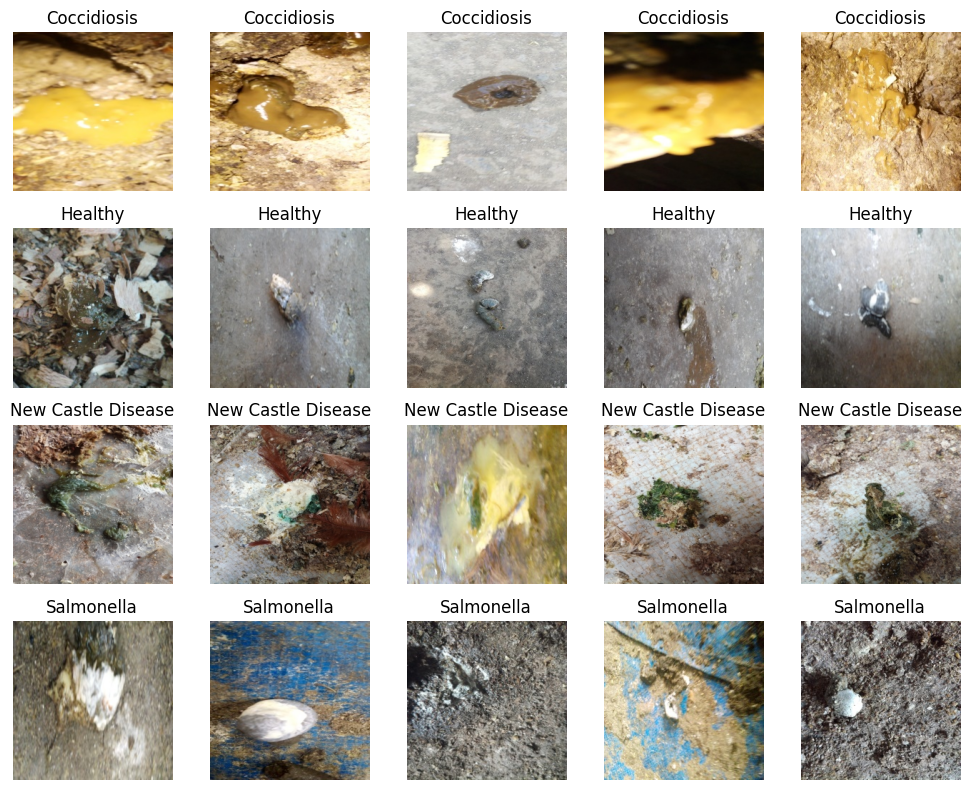

In [89]:
# Import library untuk visualisasi
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Definisikan nama kelas
class_names = ['Coccidiosis', 'Healthy', 'New Castle Disease', 'Salmonella']
train_dir = '/content/dataset_split/train'

plt.figure(figsize=(10, 8))

# Tampilkan 5 gambar dari setiap kelas
for i, class_name in enumerate(class_names):
    class_path = os.path.join(train_dir, class_name)

    # Pastikan folder kelas ada
    if os.path.isdir(class_path):
        images = os.listdir(class_path)[:5]  # Ambil 5 gambar pertama

        for j, img_name in enumerate(images):
            img_path = os.path.join(class_path, img_name)
            img = mpimg.imread(img_path)
            plt.subplot(len(class_names), 5, i * 5 + j + 1)
            plt.imshow(img)
            plt.axis('off')  # Nonaktifkan sumbu
            plt.title(class_name)

plt.tight_layout()
plt.show()  # Pastikan untuk menampilkan plot
